# Problem Statement
With the growing awareness of nutrition and personalized health goals, individuals increasingly seek guidance on selecting foods aligned with objectives like fat loss, muscle gain, dieting, or general health maintenance. However, interpreting nutritional data and manually identifying suitable foods based on multiple criteria (e.g., calories, fat, and protein) can be time-consuming and subjective.

This project aims to develop a machine learning model that classifies foods into specific health goal categories based on their nutritional content. Using a labeled dataset derived from percentile-based thresholds on calorie, fat, and protein values, we implement a Multi-layer Perceptron (MLP) classifier to learn patterns in the data and automatically categorize food items into one of four health goals:

- Fat Loss (Preserve Muscle)
- Weight Gain (Muscle Focus)
- Dieting
- General Health

# MLP

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("food.csv")

# Calculate thresholds based on quantiles
low_cal = df["Data.Kilocalories"].quantile(0.33)
high_cal = df["Data.Kilocalories"].quantile(0.67)
low_fat = df["Data.Fat.Total Lipid"].quantile(0.33)
mid_fat = df["Data.Fat.Total Lipid"].quantile(0.67)
high_protein = df["Data.Protein"].quantile(0.67)

# Define a function to classify the health goal based on nutritional content
def classify_health_goal(row):
    if row["Data.Kilocalories"] <= low_cal and row["Data.Protein"] >= high_protein and row["Data.Fat.Total Lipid"] <= mid_fat:
        return "Fat Loss (Preserve Muscle)"
    elif row["Data.Kilocalories"] >= high_cal and row["Data.Protein"] >= high_protein:
        return "Weight Gain (Muscle Focus)"
    elif row["Data.Kilocalories"] <= low_cal and row["Data.Fat.Total Lipid"] <= low_fat:
        return "Dieting"
    else:
        return "General Health"

# Apply the classification rule to create a new column "HealthGoal"
df["HealthGoal"] = df.apply(classify_health_goal, axis=1)

# Select numeric features while excluding the columns used for classification
X = df.select_dtypes(include=[np.number]).drop(columns=[
    "Nutrient Data Bank Number",
    "Data.Kilocalories",
    "Data.Protein",
    "Data.Fat.Total Lipid"
])
y = df["HealthGoal"]

print("List of features used for modeling:")
print(X.columns.tolist())


# MLP model evaluation function
def evaluate_model(X, y, random_seed):
    # Split data using a stratified approach to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=random_seed
    )
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the MLPClassifier model
    model = MLPClassifier(hidden_layer_sizes=(64, 32),
                          activation='relu',
                          max_iter=300,
                          random_state=random_seed)
    model.fit(X_train_scaled, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test_scaled)
    
    # Get performance metrics from the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    weighted_avg = report["weighted avg"]
    
    return {
        "RandomSeed": random_seed,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": weighted_avg["precision"],
        "Recall": weighted_avg["recall"],
        "F1": weighted_avg["f1-score"]
    }

# Store the 100 simulation runs for MLP
mlp_results = []

# Run the 100 simulations
for seed in range(100):
    print(f"Running round {seed + 1}/100...")
    result = evaluate_model(X, y, seed)
    mlp_results.append(result)

# Combine the results into a DataFrame and save to CSV
df_mlp = pd.DataFrame(mlp_results)
df_mlp.to_csv("mlp_results.csv", index=False)
print("The MLP model evaluation results have been saved to 'mlp_results.csv'")

List of features used for modeling:
['Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese', 'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat', 'Data.Household Weights.1st Household Weight', 'Data.Household Weights.2nd Household Weight', 'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - IU', 'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Running round 22/100...
Running round 23/100...
Running round 24/100...
Running round 25/100...
Running round 26/100...
Running round 27/100...
Running round 28/100...
Running round 29/100...
Running round 30/100...
Running round 31/100...
Running round 32/100...
Running round 33/100...
Running round 34/100...
Running round 35/100...
Running round 36/100...
Running round 37/100...
Running round 38/100...
Running round 39/100...
Running round 40/100...
Running round 41/100...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Running round 42/100...
Running round 43/100...
Running round 44/100...
Running round 45/100...
Running round 46/100...
Running round 47/100...
Running round 48/100...
Running round 49/100...
Running round 50/100...
Running round 51/100...
Running round 52/100...
Running round 53/100...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Running round 54/100...
Running round 55/100...
Running round 56/100...
Running round 57/100...
Running round 58/100...
Running round 59/100...
Running round 60/100...
Running round 61/100...
Running round 62/100...
Running round 63/100...
Running round 64/100...
Running round 65/100...
Running round 66/100...
Running round 67/100...
Running round 68/100...
Running round 69/100...
Running round 70/100...
Running round 71/100...
Running round 72/100...
Running round 73/100...
Running round 74/100...
Running round 75/100...
Running round 76/100...
Running round 77/100...
Running round 78/100...
Running round 79/100...
Running round 80/100...
Running round 81/100...
Running round 82/100...
Running round 83/100...
Running round 84/100...
Running round 85/100...
Running round 86/100...
Running round 87/100...
Running round 88/100...
Running round 89/100...
Running round 90/100...
Running round 91/100...
Running round 92/100...
Running round 93/100...
Running round 94/100...
Running round 95

# Naive_Bayes
Located in our R file 

# Model Comparison

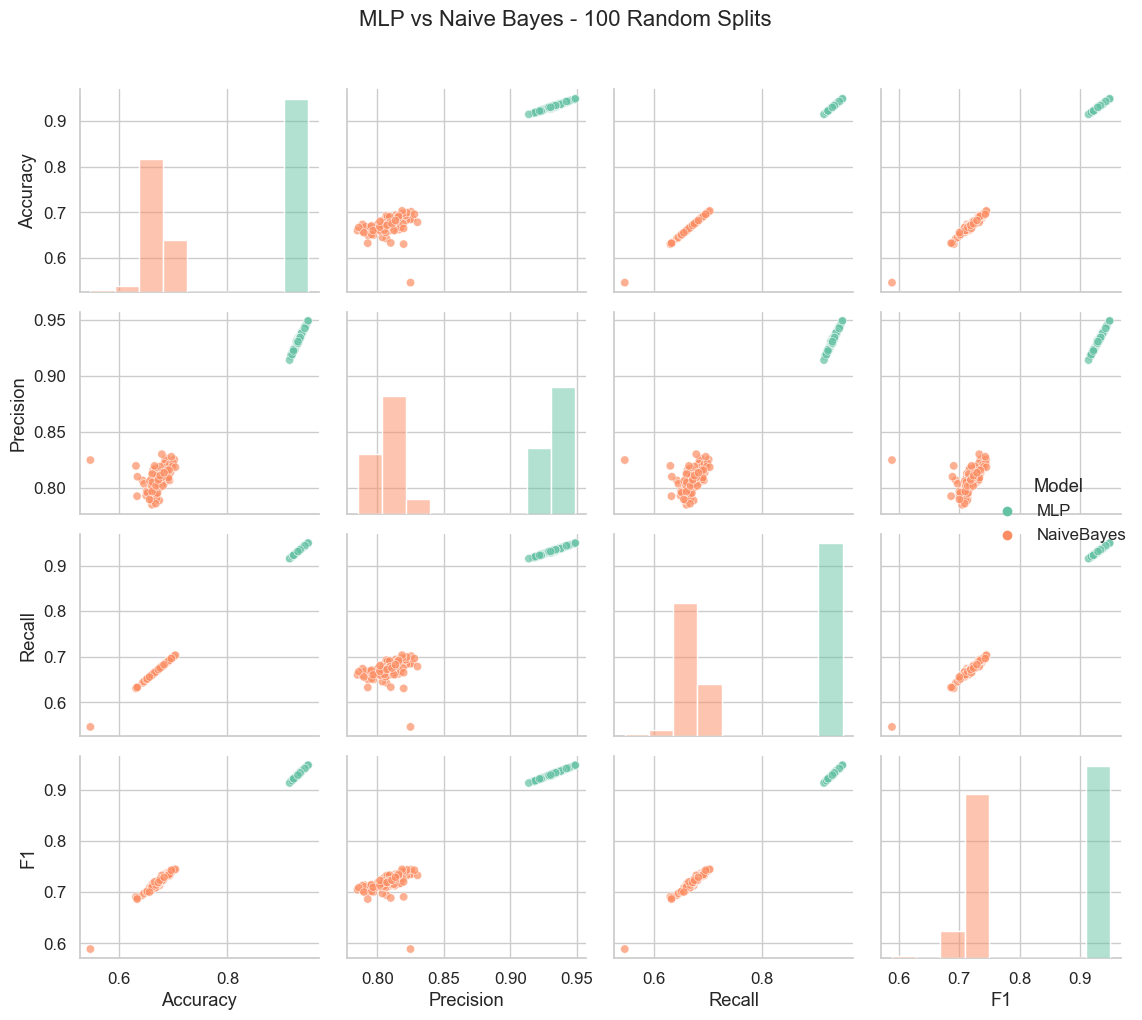

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and combine the CSV results from both Python and R code, consisting of both models 
df_mlp = pd.read_csv("mlp_results.csv")
df_mlp["Model"] = "MLP"

df_nb = pd.read_csv("naivebayes_results.csv")
df_nb["Model"] = "NaiveBayes"

df_combined = pd.concat([df_mlp, df_nb], ignore_index=True)

# Implement a Seaborn pairplot of the four metrics
sns.set(style="whitegrid", font_scale=1.1)
pairplot = sns.pairplot(
    df_combined,
    vars=["Accuracy", "Precision", "Recall", "F1"],
    hue="Model",
    diag_kind="hist",    
    palette="Set2",
    plot_kws={"alpha": 0.7}
)

# Adjust the figure title and layout
pairplot.fig.suptitle("MLP vs Naive Bayes - 100 Random Splits", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()